# Avaliação de Risco de Crédito

Uma das área que causa mais problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes.

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de default.

**Default** é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

Grandes bancos e Fintechs têm apostado cada vez mais em modelos de Machine Learning para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o Nubank é uma das que mais tem se destacado no uso de Inteligência Artificial e times de Data Science.

O conjunto de dados a ser utilizado neste Projeto de Data Science parte de uma competição realizada pela Startup Nubank a fim de revelar talentos e potenciais contratações pela Fintech.

# Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).

**OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.**

Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

In [1]:
#importando os pacotes necessarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

sns.set_style()

In [2]:
df=pd.read_csv("acquisition_train.csv")



# Análise Exploratória de Dados

A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

Em relação à dimensionalidade dos dados, nosso dataset é composto por 45 mil entradas e 43 colunas.

In [3]:
print("Dimenções do DataFrame\n:")
print(f"Linha: {df.shape[0]}\nColunas: {df.shape[1]}")

Dimenções do DataFrame
:
Linha: 45000
Colunas: 43


Já as primeiras e últimas 5 entradas desse conjunto de dados permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [4]:
#Vendo as 5 primeiras entradas

df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [5]:
#Vendo as 5 ultimas entradas
df.tail()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
44995,696cb747-1159-0a29-6731-8c52c6c42f5d,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280.0,96.379531,0.416693,103.667082,0.17,14766.42,...,730,"(-22.486891256430695, -44.909010639017616)",Facebook,768-5074915,73417.0,BR-GO,52148,"{'tags': ['n1', 'n7', 'n4', 'n0']}",Mozilla/5.0 (Linux; Android 6.0.1; SM-G920V Bu...,NaN
44996,92cd9b1a-9a8e-43ad-5d96-8e999128b472,False,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370.0,96.124977,0.692196,97.977973,0.27,NaN,...,28,"(-12.881449687799003, -46.43545330884514)",Waiting-list,772-3517810,26246.0,BR-RO,46084,"{'tags': ['n11', 'n5', 'n12']}",Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,NaN
44997,febdd174-cf18-0be1-feb8-38399dd67d9e,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280.0,102.377780,0.530938,93.687747,0.30,NaN,...,940,"(-23.888982131800983, -50.645313285616645)",Waiting-list,334-9885724,101252.0,BR-SP,30570,"{'tags': ['dfa', 'c55', 'pro+aty']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,NaN
44998,a0a5a872-6165-b939-b711-37d045a0b5a8,True,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240.0,100.476090,0.214697,86.759074,0.37,NaN,...,459,"(-5.14769885524928, -37.98386842511541)",Instagram,238-9568414,129844.0,BR-SP,12742,"{'tags': ['n9', 'n2']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
44999,a7504e93-123a-f965-70c6-ab01a0d475f7,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,530.0,101.095813,0.011369,97.362918,0.31,4226.74,...,781,"(-23.13900985246712, -52.29465769715389)",Facebook,296-8101743,112766.0,BR-MT,41693,"{'tags': ['dfa', 'c55', 'pro+aty', 'n8', 'n4']}",Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,NaN


Algumas conclusões iniciais que podem ser destacadas a respeito desse análise inicial:

- Existe uma coluna id, anônima, que representa um identificador único do cliente. Iremos eliminar esta coluna mais para frente, pois ela não contém nenhuma informação relevante.

- A variável alvo para analisar o risco de default (inadimplência) está na coluna target_default.

- As colunas ['score_3', 'score_4', 'score_5'] são numéricas e as colunas ['score_1', 'score_2'] estão codificadas de alguma maneira. Teremos que verificar a frente se existe uma quantidade de classes que possa ser convertida em informação útil.

- Existem outras variáveis que apresentam algum tipo de codificação, como ['reason', 'state', 'zip', 'channel', 'job_name', 'real_state'] que estão codificadas e também precisarão de alguma análise mais aprofundada para saber se é possível extrair alguma informação das mesmas.

- A coluna profile_tags contém um dicionário com tags atribuídas a cada cliente, aparentemente.

- A coluna target_fraud seria a variável alvo de outro modelo para este mesmo dataset, onde o objetivo seria a detecção de fraude.

- A coluna lat_lon está em formato string contendo uma tupla com as coordenadas.

In [6]:
#Resume estátistico dos dados Númericos
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [7]:
print("Tipos De Variaveis: \n\n")

print(df.dtypes)

Tipos De Variaveis: 


ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip              

In [8]:
#Valores ausentes

print("Valores Ausentes: \n")

(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

Valores Ausentes: 



target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defaulted_loans       

Em relação à porcentagem de valores ausentes identificados neste dataset:

Diversas variáveis como ['target_fraud', 'last_amount_borrowed', 'last_borrowed_in_months', 'ok_since', 'external_data_provider_credit_checks_last_2_year'] possuem mais da metade dos valores ausentes.

As variáves ['external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues'] possuem entre 25-34% do seus valores ausentes.

A variável alvo target_default contém valores nulos que serão eliminados do dataset.

Neste projeto, o caso mais extremo (target_fraud) não representa um problema, pois é uma variável alvo que não interessa para a análise de risco de inadimplência. Já as demais features deverão ser usadas com o devido cuidado.

Uma outra análise interessante de se fazer diz respeito à contagem de valore únicos por features. Muitas vezes, variáveis numéricas podem esconder classes/categorias que melhor representariam uma feature, ou revelar uma quantidade elevada de classes para "variáveis categóricas".

In [9]:
print("Contagem dos Valores Únicos:")

print(df.nunique().sort_values())

Contagem dos Valores Únicos:
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                   

A contagem de valores únicos mostra que as colunas external_data_provider_credit_checks_last_2_year e channel apresentam um único valor possível. Como não ha maiores informações sobre cada feature iremos descartar as duas colunas para o modelo de Machine Learning.

Também se percebe que profile_phone_number possui 45 mil valores únicos, não trazendo provavelmente nenhuma informação que possa contribuir para a análise.

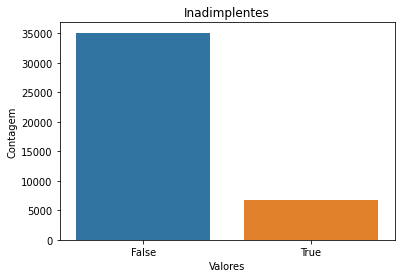

Proporção entre Inadimplentes no Dataset:
False    0.779556
True     0.148022
Name: target_default, dtype: float64


In [10]:
fig,ax=plt.subplots()

sns.countplot("target_default",data=df,ax=ax)
ax.set_title("Inadimplentes")
ax.set_xlabel("Valores")
ax.set_ylabel("Contagem")

#plt.tight_layout();
plt.show()
print("Proporção entre Inadimplentes no Dataset:")
print(df["target_default"].value_counts()/df.shape[0])

# Preparação dos Dados
Com as informações que obtivemos da etapa anterior, vamos prosseguir com a limpeza e preparação dos dados.

In [11]:
#Copiar nosso Dataframe

df_clear=df.copy()

In [12]:
#substituir inf por nan em reported_income 

df_clear["reported_income"]=df_clear["reported_income"].replace(np.inf,np.nan)



In [13]:
#Dando um describe
df_clear.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,4.493300e+04,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,1.032542e+13,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,2.559648e+14,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,4.030000e+02,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,5.085600e+04,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,1.016300e+05,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,1.511870e+05,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,6.355500e+15,56000.000000


Vendo um Describe podemos ver que na variavel reported_income já não existe valores inf, nós os substituimos por valores NAN.

In [14]:
# descartar as colunas ids, target_fraud,
# external_data_provider_credit_checks_last_2_year e channel

df_clear.drop(labels=["ids","target_fraud","external_data_provider_credit_checks_last_2_year"
                ,"channel"],axis=1,inplace=True)

In [16]:
#  substituir -999 em external_data_provider_email_seen_before por NaN
df_clear.loc[df_clear["external_data_provider_email_seen_before"]==-999.0
                                                         ,"external_data_provider_email_seen_before"]=np.nan

In [17]:
# eliminar colunas sem informação aparente ou que demandam mais pesquisa

drop_var = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'profile_phone_number', 'shipping_state']
df_clear.drop(labels=drop_var,axis=1,inplace=True)


In [18]:
df_clear.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,...,0.0,0.0,18.0,18.0,444,2,0.0,51.0,645,57849.0
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,...,0.0,0.0,14.0,14.0,346,1,0.0,17.0,243,4902.0
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,...,0.0,0.0,10.0,NaN,6,2,NaN,9.0,65,163679.0
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,...,1.0,0.0,19.0,19.0,406,3,NaN,38.0,815,1086.0
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,...,0.0,0.0,11.0,NaN,240,2,1.0,46.0,320,198618.0


In [22]:
#eliminar as entradas onde target_default é NaN
    
df_clear.dropna(subset=["target_default"],inplace=True)

Apesar de não haver maiores informações sobre as features, podemos assumir como premissa que muitos valores são nulos devido a dois fatores:

1- Há alguns itens que não são obrigatórios durante a etapa de preenchimento dos formulários, como a informação sobre o perfil do cliente no Facebook; e

2- Não existe observação alguma referente à coluna, como é caso das colunas ['last_amount_borrowed', 'last_borrowed_in_months', 'n_issues'].
De maneira geral, para as variáveis que se enquadram no segundo caso, os valores NaN serão substituidos por zero. Para as variáveis numéricas, será adotado o valor da mediana, e para as categóricas o valor mais frequente.

In [25]:
from sklearn.impute import SimpleImputer

In [27]:
#Variavel Númerica
num_df=df_clear.select_dtypes(exclude="object").columns

In [40]:
#Variaveis Categorica

cat_df=df_clear.select_dtypes(include="object").columns

In [41]:
#Substituindo valores ausentes com fillna

df_clear.last_amount_borrowed.fillna(value=0,inplace=True)
df_clear.last_borrowed_in_months.fillna(value=0,inplace=True)
df_clear.n_issues.fillna(value=0,inplace=True)

In [46]:
#Substituindo valores ausentes com SimpleImputer(Variaveis numericas)

imputer=SimpleImputer(missing_values=np.nan,strategy="median")
imputer=imputer.fit(df_clear.loc[:,num_df])

df_clear.loc[:,num_df]=imputer.transform(df_clear.loc[:,num_df])

In [47]:
#Substituindo valores ausentes com SimpleImputer(Variaveis Categoricas)

imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer=imputer.fit(df_clear.loc[:,cat_df])

df_clear.loc[:,cat_df]=imputer.transform(df_clear.loc[:,cat_df])

Podemos agora verificar que as variáveis escolhidas não possuem mais os valores nulos iniciais.

In [49]:
df_clear.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

In [50]:
from sklearn.preprocessing import StandardScaler

scaled_df = df_clear.copy()
# normalizar as colunas numéricas
num_cols = scaled_df.drop('target_default',
                         axis=1).select_dtypes(exclude='object').columns

scaled_df[num_cols] = StandardScaler().fit_transform(scaled_df[num_cols].values)

In [51]:
scaled_df.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,0.032154,0.563484,-0.832617,0.848870,1.039282,2.627224,1.11413,...,-0.278592,-0.057693,1.604337,1.577495,1.341208,0.444809,-1.427247,1.322812,0.501783,-0.040691
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,0.213805,-0.924750,1.538588,-0.789902,-0.536149,-0.577743,-0.68792,...,-0.278592,-0.057693,0.732520,0.937596,0.671463,-0.452701,-1.427247,-0.635622,-0.894101,-0.040691
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,0.122980,0.006361,-0.512003,1.294382,-0.043827,0.345051,1.11413,...,-0.278592,-0.057693,-0.139296,-1.302049,-1.652141,0.444809,0.700650,-1.096430,-1.512178,-0.040691
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,1.485366,0.500243,1.694857,-0.500560,0.251567,-0.577743,-0.68792,...,3.365634,-0.057693,1.822291,1.737469,1.081511,1.342319,0.700650,0.573999,1.092082,-0.040691
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,1.394540,-0.481355,0.114978,1.816579,-1.126935,-0.577743,-0.68792,...,-0.278592,-0.057693,0.078658,-1.302049,-0.052955,0.444809,0.700650,1.034807,-0.626730,-0.040691


Continuando com a preparação dos dados, irei realizar o Label Encoding para possibilitar que as variáveis categóricas possam ser codificadas em forma de labels e alimentar o modelo de Machine Learning.

In [53]:
from sklearn.preprocessing import LabelEncoder

encoded_df = scaled_df.copy()
# extrair as colunas categóricas
cat_cols = encoded_df.select_dtypes('object').columns

# codificar cada coluna categórica
for col in cat_cols:
  encoded_df[col+'_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, axis=1, inplace=True)

In [54]:
encoded_df

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_encoded,score_2_encoded,state_encoded,real_state_encoded
0,False,0.032154,0.563484,-0.832617,0.848870,1.039282,2.627224,1.11413,-1.031599,-0.116075,...,1.341208,0.444809,-1.427247,1.322812,0.501783,-0.040691,0,10,44,1
1,False,0.213805,-0.924750,1.538588,-0.789902,-0.536149,-0.577743,-0.68792,0.283752,0.553756,...,0.671463,-0.452701,-1.427247,-0.635622,-0.894101,-0.040691,3,16,47,1
2,True,0.122980,0.006361,-0.512003,1.294382,-0.043827,0.345051,1.11413,-0.196782,-0.115893,...,-1.652141,0.444809,0.700650,-1.096430,-1.512178,-0.040691,3,9,32,3
3,False,1.485366,0.500243,1.694857,-0.500560,0.251567,-0.577743,-0.68792,0.775941,-0.043057,...,1.081511,1.342319,0.700650,0.573999,1.092082,-0.040691,0,21,23,3
4,False,1.394540,-0.481355,0.114978,1.816579,-1.126935,-0.577743,-0.68792,-0.196782,-0.211806,...,-0.052955,0.444809,0.700650,1.034807,-0.626730,-0.040691,2,1,47,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,False,-0.603626,-1.139301,-0.287151,0.373924,-1.225399,1.312728,1.11413,-0.679733,0.553647,...,-1.201088,0.444809,0.700650,-1.211632,0.796932,-0.040691,3,16,46,1
44996,False,0.213805,-1.219255,0.669187,-0.193705,-0.240755,-0.577743,-0.68792,0.169057,0.458227,...,-1.344605,-0.452701,0.700650,-1.557237,-1.640655,-0.040691,6,31,36,1
44997,False,-0.603626,0.744699,0.109421,-0.621761,0.054638,-0.577743,-0.68792,-1.031599,0.668606,...,1.559900,0.444809,0.700650,-0.059612,1.526125,-0.040691,4,24,47,4
44998,True,-0.966929,0.147394,-0.988329,-1.313067,0.743889,-0.577743,-0.68792,-1.031599,2.180249,...,-1.453951,-1.350210,0.700650,-1.499636,-0.144074,-0.040691,6,5,47,1


In [55]:
from sklearn.model_selection import train_test_split

In [59]:
X=encoded_df.drop("target_default",axis=1).select_dtypes(exclude="object")

In [63]:
Y=encoded_df["target_default"]

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

## Construção do Modelo
Arbitrariamente, escolhi o XGBoost para a construção do modelo, uma vez que este vem se destacando e apresentando bons resultados em problemas similares a este.

Não foi realizada uma análise mais aprofundada sobre as variáveis e nem um tunning de parâmetros, mas construído um modelo simples para servir de baseline. Ressalta-se que os valores dos parâmetros do XGBoost também foram generalistas e arbitrários.

In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [73]:
modelo=XGBClassifier(learning_rate=0.01, n_estimators=1000,
                         max_depth=3, subsample = 0.9,
                         colsample_bytree = 0.1, gamma=1,
                         random_state=42)

In [74]:
modelo.fit(x_train,y_train)

[01:54:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

Lembra-se que o dataset utilizado neste projeto é desbalanceado, o que pode gerar métricas que não representam a realidade da situação problemática do mundo real.

Sem ser exaustivo, será apresentada apenas a acurácia do modelo como métrica simples de avaliação.

In [75]:
y_predict=modelo.predict(x_test)

In [76]:
y_predict

array([False, False, False, ..., False, False, False])

In [77]:
y_predict_proba=modelo.predict_proba(x_test)

In [78]:
y_predict_proba

array([[0.84681785, 0.15318212],
       [0.8785005 , 0.12149948],
       [0.901594  , 0.09840603],
       ...,
       [0.8586125 , 0.14138752],
       [0.88858044, 0.11141958],
       [0.91712725, 0.08287275]], dtype=float32)

In [79]:
print("ACCURACIA")

print(accuracy_score(y_test,y_predict))

ACCURACIA
0.8411722430727462
